# Chapter 23

# Image Processing Techniques III

## Chapter 13


In [38]:
import numpy as np
import matplotlib.pyplot as plt

def create_canvas(height=500, width=500, bgColor=0):
    # create the image (canvas)
    canvas = np.zeros((height, width, 3), dtype='uint8')
    if bgColor != 0:
        canvas[:] = bgColor
    return canvas

def toRGB(img):
    return img[:,:,::-1]
    
def show_in_matplotlib(img, figsize=(6,8), title=None):
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # imgRGB = toRGB(img)
    plt.figure(figsize=figsize)
    
    plt.imshow(imgRGB)
    plt.title(title)
    plt.show()



## Class Activity

Add the code below as a function in the color_palette module. 

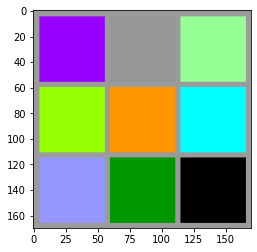

In [44]:
import cv2 as cv
import random
# from gokPrj.image_processing.canvas import create_canvas
# from gokPrj.image_processing.utilities import show_in_matplotlib

squareSize = 50
padding = 5
nrows = 3
ncols = 3

# silver or gray background
height = (nrows * squareSize) + ((nrows+1)*padding)
width = (ncols * squareSize) + ((ncols+1)*padding)
bgColor = (155,155,155)

img = create_canvas(height,width, bgColor)

b = 0
# draw each row of square color
for i in range(nrows):
    # start each row at point 0 on the right
    r = 0
    # start each row at the top at point bottom + padding
    t = b + padding
    # bottom of the square
    b = t + squareSize

    # draw each square per column on a row
    for j in range(ncols):
        l = r + padding        
        r = l + squareSize        
        color = random.choices([0,150,255])[0],random.choices([0,150,255])[0],random.choices([0,150,255])[0]
        # color = random.randint(0,255), random.randint(0,255), random.randint(0,255)
        cv.rectangle(img, (l,t),(r,b), color=color,thickness= -1)

# save the image
cv.imwrite(f'color_img_{nrows}x{ncols}.png', img )

show_in_matplotlib(img, None)


In [46]:
imgRGBA = cv.cvtColor(img, cv.COLOR_BGR2RGBA)

print(img.shape)
print(imgRGBA.shape)


(170, 170, 3)
(170, 170, 4)


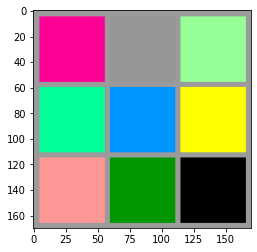

array([155, 155, 155, 255], dtype=uint8)

In [49]:
show_in_matplotlib(imgRGBA, None)

imgRGBA[0,0,:]



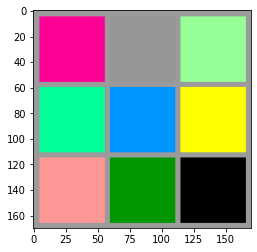

In [50]:
imgRGBA[:,:,3] = 0

show_in_matplotlib(imgRGBA, None)


## Color Spaces

1. BGR (Blue Green Red)
2. GrayScale
3. RGB (Red Green Blue)
3. RGBA (Red Green Blue, alpha(transparent))
4. HSV (Hue, Saturation, Value)
5. HSL (Hue, Saturation, light...)


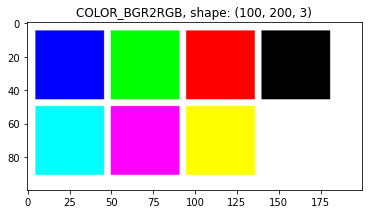

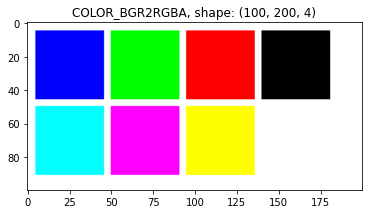

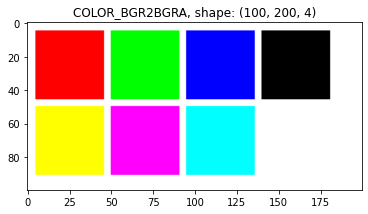

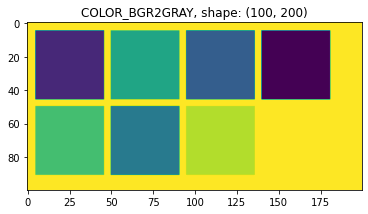

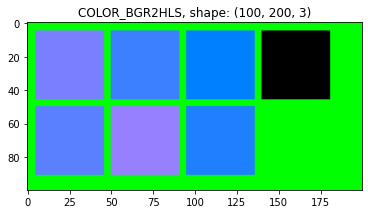

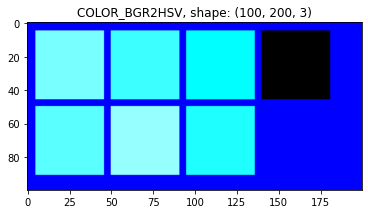

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../essential/color_img.png')

img4Show = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img4Show)
plt.title(f'COLOR_BGR2RGB, shape: {img4Show.shape}')
plt.show()

img4Show = cv.cvtColor(img, cv.COLOR_BGR2RGBA)
plt.imshow(img4Show)
plt.title(f'COLOR_BGR2RGBA, shape: {img4Show.shape}')
plt.show()

img4Show = cv.cvtColor(img, cv.COLOR_BGR2BGRA)
plt.imshow(img4Show)
plt.title(f'COLOR_BGR2BGRA, shape: {img4Show.shape}')
plt.show()

img4Show = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img4Show)
plt.title(f'COLOR_BGR2GRAY, shape: {img4Show.shape}')
plt.show()

img4Show = cv.cvtColor(img, cv.COLOR_BGR2HLS)
plt.imshow(img4Show)
plt.title(f'COLOR_BGR2HLS, shape: {img4Show.shape}')
plt.show()

img4Show = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.imshow(img4Show)
plt.title(f'COLOR_BGR2HSV, shape: {img4Show.shape}')
plt.show()



## Chapter 14a



## Chapter 14b


## Image Histrograms

Histograms are used to understand image content.   
Histogram of an image can be use to adjust the image. 

### Histograms Theory 

Histogram is a statiscal tool for presenting the distribution of data.

An image histogram is atype of histogram that reflects the tonal distribution of the image, by plotting the frequency (numbers) of pixel for each tonal value.  

    cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])


# Example

In [13]:
import cv2 as cv 
import numpy as np 

data = np.random.randint(0,10, 20)

data

array([2, 6, 2, 4, 0, 7, 4, 0, 9, 9, 0, 5, 3, 1, 1, 4, 6, 3, 0, 7])

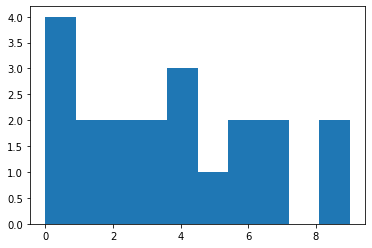

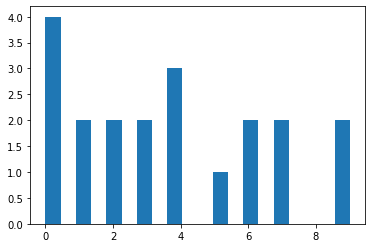

In [52]:
hist = plt.hist(data)
plt.show()
hist = plt.hist(data, bins=20)
plt.show()


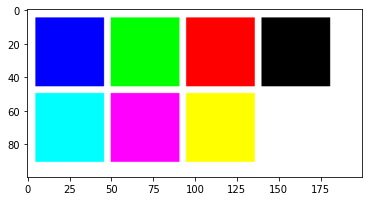

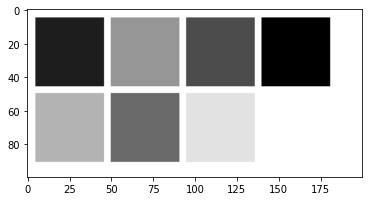

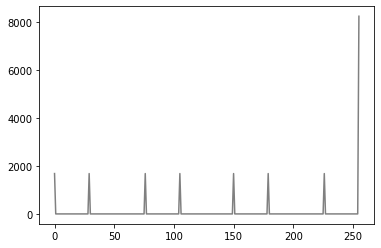

In [55]:
import cv2 as cv 
import numpy as np 

img = cv.imread('../essential/color_img.png')
# img = cv.imread('../essential/assets/ca.jpg')

imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

imgRGB = cv.cvtColor(imgGray, cv.COLOR_GRAY2RGB)
plt.imshow(imgRGB)
plt.show()

channels = [0]
mask = None
histSize =[256]
ranges = [0,256]
hist = cv.calcHist([imgGray], channels, mask, histSize, ranges)
# hist

plt.plot(hist, color='gray')
plt.show()

channels = [0]
mask = None
histSize =[256]
ranges = [0,256]
histB = cv.calcHist([img], [0], mask, histSize, ranges)
histG = cv.calcHist([img], [1], mask, histSize, ranges)
histR = cv.calcHist([img], [2], mask, histSize, ranges)




plt.show()

import cv2 as cv



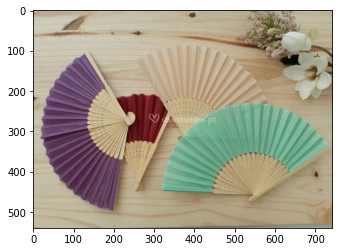

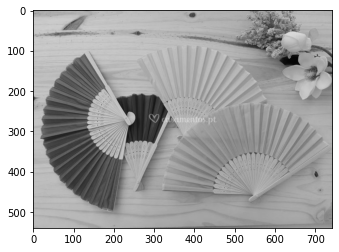

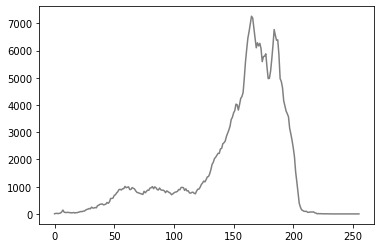

In [56]:
import cv2 as cv 
import numpy as np 

img = cv.imread('../essential/assets/ca.jpg')

imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

imgRGB = cv.cvtColor(imgGray, cv.COLOR_GRAY2RGB)
plt.imshow(imgRGB)
plt.show()

channels = [0]
mask = None
histSize =[256]
ranges = [0,256]
hist = cv.calcHist([imgGray], channels, mask, histSize, ranges)
# hist

plt.plot(hist, color='gray')
plt.show()

channels = [0]
mask = None
histSize =[256]
ranges = [0,256]
histB = cv.calcHist([img], [0], mask, histSize, ranges)
histG = cv.calcHist([img], [1], mask, histSize, ranges)
histR = cv.calcHist([img], [2], mask, histSize, ranges)




plt.show()